# Features and prediction

**Realizar una exploración visual.** 
<br/>

* ¿Es relevante el género para el abandono? (es decir, ¿hay más
probabilidades de que abandone siendo de algún género en particular?). 
* ¿Si es un senior citizen? 
* ¿El método de pago?

<hr/>

In [16]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns

In [17]:
df_churn = pd.read_csv('../data/preprocessed/churn_preprocessed.csv')

In [18]:
df_churn.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df_churn.sample(5)

,Unnamed: 0.1,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5858,6869,6869,5906-CVLHP,Female,No,Yes,Yes,45.0,Yes,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),54.15,2319.80,Yes
3455,4462,4462,6087-MVHJH,Female,No,No,No,16.0,Yes,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.45,1422.10,Yes
2322,3326,3326,7657-DYEPJ,Male,Yes,No,No,38.0,Yes,No,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,2497.35,Yes
775,777,777,7314-OXENN,Male,No,No,No,2.0,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,82.00,184.65,Yes
5554,6563,6563,6906-ANDWJ,Male,No,Yes,Yes,15.0,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,1107.25,Yes


<hr/>

In [20]:
gender = pd.DataFrame(df_churn.groupby(['gender', 'Churn'])['Churn'].agg(['count'])).reset_index()
SeniorCitizen = pd.DataFrame(df_churn.groupby(['SeniorCitizen','Churn'])['Churn'].agg(['count'])).reset_index()
PaymentMethod = pd.DataFrame(df_churn.groupby(['PaymentMethod','Churn'])['Churn'].agg(['count'])).reset_index()

### Gender insight

 ¿Es relevante el género para el abandono?
 <br/>
 
 Plot analysis 

In [21]:
gender = gender.rename(columns={'Churn':'churn','count': 'amount'})
gender

,gender,churn,amount
0,Female,No,2200
1,Female,Yes,800
2,Male,No,2234
3,Male,Yes,798


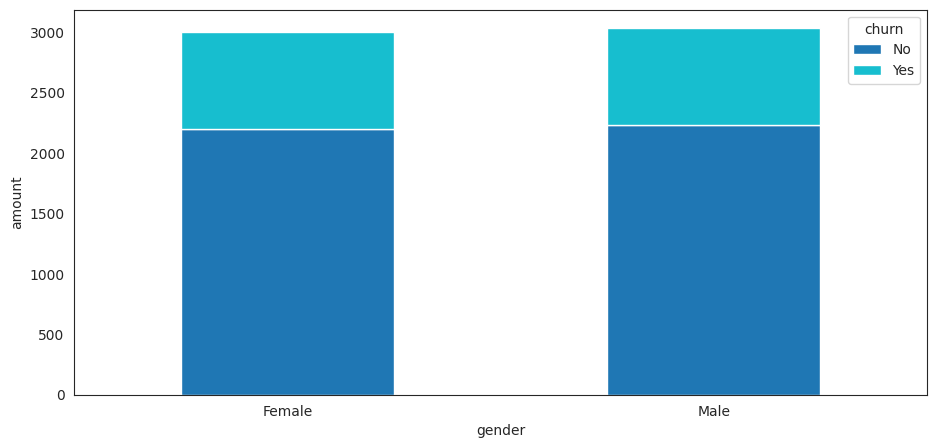

In [22]:
sns.set_style('white')
(gender
    .groupby(['gender', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### SeniorCitizen insight

Plot analysis shows that [SeniorCitizen = 1] has similar proportions between Churn (yes/no), It means that being a SeniorCitizen doesn't relate to an specific Churn condition.
<br/>

**In the opposite, [SeriorCitizen = 0] gives us more chances of having [Churn = No].**

In [23]:
SeniorCitizen = SeniorCitizen.rename(columns={'Churn':'churn','count': 'amount'})
SeniorCitizen

,SeniorCitizen,churn,amount
0,No,No,3861
1,No,Yes,1180
2,Yes,No,573
3,Yes,Yes,418


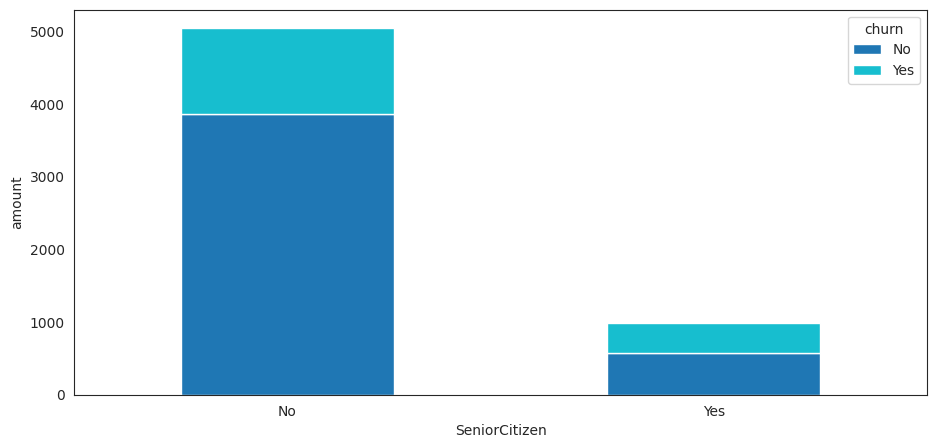

In [24]:
sns.set_style('white')
(SeniorCitizen
    .groupby(['SeniorCitizen', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### PaymentMethod insight

There is more [Churn = Yes] probability if the client has **Electronic check** as payment method.

In [25]:
PaymentMethod = PaymentMethod.rename(columns={'Churn':'churn','count': 'amount'})
PaymentMethod

,PaymentMethod,churn,amount
0,Bank transfer (automatic),No,1092
1,Bank transfer (automatic),Yes,212
2,Credit card (automatic),No,1114
3,Credit card (automatic),Yes,199
4,Electronic check,No,1103
5,Electronic check,Yes,913
6,Mailed check,No,1125
7,Mailed check,Yes,274


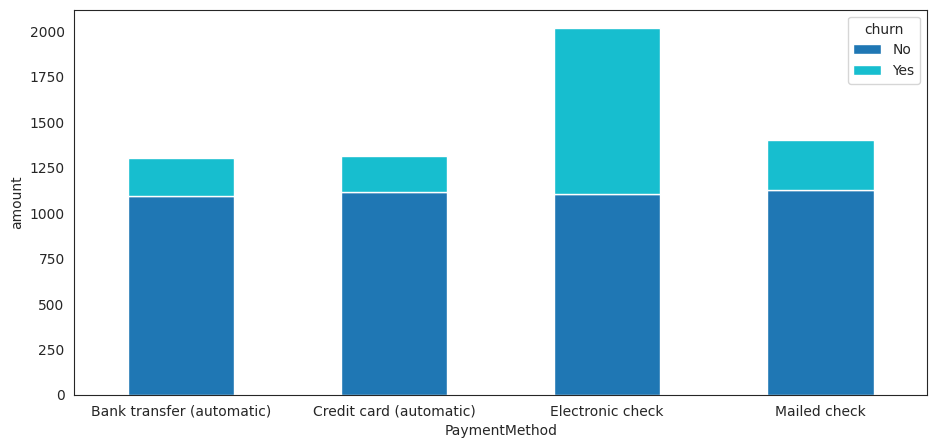

In [26]:
sns.set_style('white')
(PaymentMethod
    .groupby(['PaymentMethod', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');